# Pre-Masters Maths 6601PMEC

## Week 9 - Developing the Ideas Behind Fourier Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath as cm
from ipywidgets import interactive

Using the _linspace_ command from the _NumPy_ library, let's create an array representing time, $t$, between 0s and $2 \pi$s. The time step $\Delta t$ is $\dfrac{2 \pi}{100} \approx 0.0628$s

In [2]:
t = np.linspace(0, 2*np.pi, 101)

Using this array, which contains a set of evenly spaced, discrete time values, we will calculate the varying amplitude for the function $cos(t)$.

In [3]:
A = np.cos(t)

Now let's plot this ampltitude vs time graph using _matplotlib_.

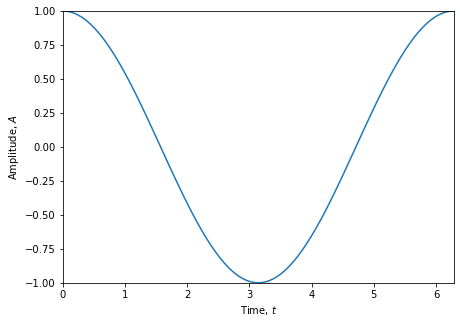

In [4]:
fig, ax = plt.subplots(figsize=(7,5))
_ = ax.plot(t, A)
_ = ax.set_xlim(0, 2*np.pi)
_ = ax.set_ylim(-1, 1)
_ = ax.set_xlabel('Time, $t$')
_ = ax.set_ylabel('Amplitude, $A$')

After our previous lesson on complex numbers, we now know this cosine wave can be represented by the function $e^{t j}$ where it's real component represents the amplitude of the wave.

In [5]:
A_Complex = np.exp(t*1j)

If we plot the real component of the function over time, we get the exact same plot.

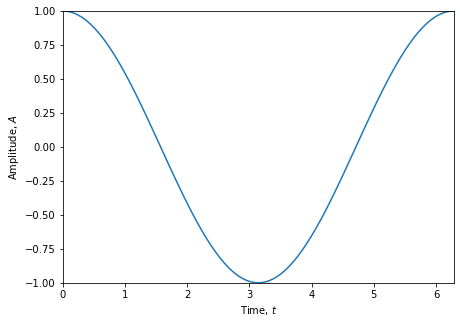

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
_ = ax.plot(t, A_Complex.real)
_ = ax.set_xlim(0, 2*np.pi)
_ = ax.set_ylim(-1, 1)
_ = ax.set_xlabel('Time, $t$')
_ = ax.set_ylabel('Amplitude, $A$')

Below is an interactive visualisation which demonstrates the relationship of the real component of the complex vector and the amplitude of the cosine function.  
  
The orange line is representing the real magnitude of the complex vector (green line), which in turn is the same as the magnitude of the cosine function at that particular time.

In [7]:
def complexVisual(time):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))
    _ = ax1.plot(A_Complex.real, A_Complex.imag)
    _ = ax1.plot([0, A_Complex.real[time]],[0, 0])
    _ = ax1.plot([0,A_Complex.real[time]], [0,A_Complex.imag[time]])
    _ = ax1.set_xlabel('$\mathbb{R}$')
    _ = ax1.set_ylabel('$\mathbb{I}$')
    _ = ax1.set_title('$e^{tj}$')
    _ = ax2.plot(t, A_Complex.real)
    _ = ax2.plot([t[time], t[time]], [0, A_Complex.real[time]])
    _ = ax2.set_xlabel('Time, $t$')
    _ = ax2.set_ylabel('Amplitude, $A$')
    _ = ax2.set_title('$\cos(t)$')

interactive_plot = interactive(complexVisual, time=(0, 101))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=50, description='time', max=101), Output()), _dom_classes=('widget-inter…

If we know that angular frequency $\omega$ is calculated as $$ \omega = 2 \pi f$$
then we can represent the function $$A = cos(\omega t) = cos(2 \pi f t)$$
This means that $cos(2 \pi t)$ is represented by the function $$e^{2 \pi f t j}$$
We can also introduce a negative sign in the exponent, which will have the effect of the complex vector rotating clockwise as time progresses. $$e^{- 2 \pi f t j}$$

Below is a demonstration of plotting the cosine function (with differing frequency) using the real component of this complex number.

In [8]:
def complexFreq(f):
    A2_Complex = np.exp(-2*np.pi*1j*t*f)
    fig, ax = plt.subplots(figsize=(14,7))
    _ = ax.plot(t, A2_Complex.real)
    _ = ax.set_xlabel('Time, $t$')
    _ = ax.set_ylabel('Amplitude, $A$')
    _ = ax.set_xlim(0, 2*np.pi)
    _ = ax.set_ylim(-1, 1)
    
interactive_plot = interactive(complexFreq, f=(0.1, 1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=0.55, description='f', max=1.0, min=0.1), Output()), _dom_classes=('wi…

In [9]:
def waveFreq(freq1, freq2):
    t = np.linspace(0, 3, 500)
    fig, ax = plt.subplots(figsize=(14,5))
    wave1 = np.cos(2*np.pi*freq1*t)
    wave2 = np.cos(2*np.pi*freq2*t)
    wave12 = wave1 + wave2
    _ = ax.plot(t, wave1, label='Wave 1')
    _ = ax.plot(t, wave2, label='Wave 2')
    _ = ax.plot(t, wave12, label='Combined Waves')
    _ = ax.set_xlabel('Time, $t$')
    _ = ax.set_ylabel('Amplitude, $A$')
    _ = ax.set_xlim(0, 3)
    _ = ax.legend()
    
interactive_plot = interactive(waveFreq, freq1=(1, 9), freq2=(1,9))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=5, description='freq1', max=9, min=1), IntSlider(value=5, description='f…

In [10]:
def waveFreqComp(freq1, freq2):
    t = np.linspace(0, 1, 500)
    wave1_C = np.exp(-2*np.pi*1j*t*freq1)
    wave2_C = np.exp(-2*np.pi*1j*t*freq2)
    wave12_C = wave1_C + wave2_C
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,7))
    ax1.plot(wave1_C.real, wave1_C.imag, label='$e^{%s tj}$' % (freq1*2*3.14))
    ax1.plot(wave2_C.real, wave2_C.imag, label='$e^{%s tj}$' % (freq2*2*3.14))
    ax1.plot(wave12_C.real, wave12_C.imag, label='Combined')
    ax1.set_xlabel('$\mathbb{R}$')
    ax1.set_ylabel('$\mathbb{I}$')
    ax1.set_title('$e^{-2 \pi \, f \, t \, j}$')
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax1.legend()
    ax2.plot(t, wave1_C.real, label='$\cos($%s$t)$' % (freq1*2*3.14))
    ax2.plot(t, wave2_C.real, label='$\cos($%s$t)$' % (freq2*2*3.14))
    ax2.plot(t, wave12_C.real, label='Combined')
    ax2.set_xlabel('Time, $t$')
    ax2.set_ylabel('Amplitude, $A$')
    ax2.set_title('$\cos(2 \pi \, f \, t)$')
    ax2.legend()
    
interactive_plot = interactive(waveFreqComp, freq1=(1, 9), freq2=(1,9))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=5, description='freq1', max=9, min=1), IntSlider(value=5, description='f…

In [11]:
def freqAnalysis(freq):
    t = np.linspace(0, 2, 500)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), gridspec_kw={'width_ratios': [3, 5]})
    fourComp = np.cos(-2*np.pi*t*freq)*np.exp(-2*np.pi*1j*t*2)
    ax1.plot(fourComp.real, fourComp.imag)
    ax1.set_title('$cos(4 \pi t) e^{%s \pi}$' % (-2*freq))
    ax1.set_xlabel('$\mathbb{R}$')
    ax1.set_ylabel('$\mathbb{I}$')
    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1, 1)
    ax2.plot(t, np.cos(2*np.pi*t*freq), label='$cos(4 \pi t) e^{%s \pi}$' % (-2*freq))
    ax2.plot(t, np.cos(2*np.pi*t*2), label='$\cos(4 \pi t)$')
    ax2.set_xlabel('Time, $t$')
    ax2.set_ylabel('Amplitude, $A$')
    ax2.legend()
    
interactive_plot = interactive(freqAnalysis, freq=(0.5, 5))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=2.75, description='freq', max=5.0, min=0.5), Output()), _dom_classes=(…

In [12]:
def freqAnalysis(freq):
    t = np.linspace(0, 2, 500)
    fig = plt.figure(figsize=(14,12), constrained_layout=True)
    gs = fig.add_gridspec(2, 4)
    fourComp = np.cos(-2*np.pi*t*freq)*np.exp(-2*np.pi*1j*t*2)
    ax1 = fig.add_subplot(gs[0, 0:2])
    ax1.plot(fourComp.real, fourComp.imag)
    ax1.scatter(np.sum(fourComp).real/len(fourComp), np.sum(fourComp).imag/len(fourComp), color='red', zorder=3)
    ax1.annotate("Centre of \n Mass", (np.sum(fourComp).real/len(fourComp), np.sum(fourComp).imag/len(fourComp)))
    ax1.set_title('$cos(4 \pi t) e^{%s \pi}$' % (-2*freq))
    ax1.set_xlabel('$\mathbb{R}$')
    ax1.set_ylabel('$\mathbb{I}$')
    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1, 1)
    ax2 = fig.add_subplot(gs[0, 2:4])
    ax2.plot(t, np.cos(2*np.pi*t*freq), label='$cos(4 \pi t) e^{%s \pi}$' % (-2*freq))
    ax2.plot(t, np.cos(2*np.pi*t*2), label='$\cos(4 \pi t)$')
    ax2.set_title('$\cos(4 \pi t)$')
    ax2.set_xlabel('Time, $t$')
    ax2.set_ylabel('Amplitude, $A$')
    ax2.legend()
    ax3 = fig.add_subplot(gs[1, :])
    freqRng = np.linspace(0, 5, 501)
    CoM_Real = np.array([])
    CoM_Imag = np.array([])
    for i in range(501):
        complexRng = (np.cos(-2*np.pi*t*freqRng[i])*np.exp(-2*np.pi*1j*t*2))
        CoM_Real = np.append(CoM_Real, np.sum(complexRng).real/len(complexRng))
        CoM_Imag = np.append(CoM_Imag, np.sum(complexRng).imag/len(complexRng))
    ax3.plot(freqRng[:int(freq/0.01)+1], CoM_Real[:int(freq/0.01)+1], label='Real Component')
    ax3.plot(freqRng[:int(freq/0.01)+1], CoM_Imag[:int(freq/0.01)+1], label='Imag Component')
    ax3.set_xlim(0, 5)
    ax3.set_ylim(np.min(CoM_Imag), np.max(CoM_Real))
    ax3.set_xlabel('Frequency, $f$')
    ax3.set_ylabel('Centre of Mass Magnitude')
    ax3.legend()
    
interactive_plot = interactive(freqAnalysis, freq=(0, 5.0))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=2.5, description='freq', max=5.0), Output()), _dom_classes=('widget-in…

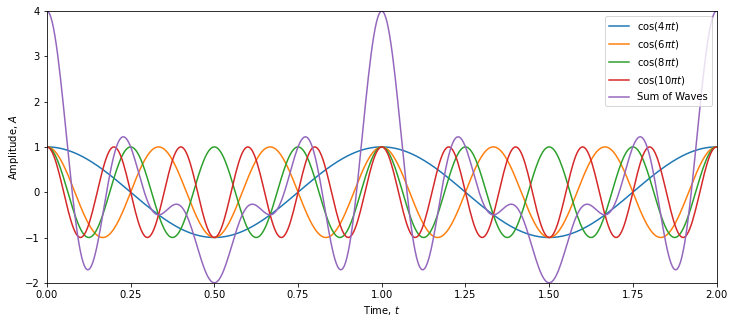

In [13]:
t = np.linspace(0, 2, 501)
wave1 = np.cos(2*np.pi*t)
wave2 = np.cos(2*np.pi*3*t)
wave3 = np.cos(2*np.pi*4*t)
wave4 = np.cos(2*np.pi*5*t)
wave14 = wave1 + wave2 + wave3 + wave4
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(t, wave1, label='$\cos(4 \pi t)$')
ax.plot(t, wave2, label='$\cos(6 \pi t)$')
ax.plot(t, wave3, label='$\cos(8 \pi t)$')
ax.plot(t, wave4, label='$\cos(10 \pi t)$')
ax.plot(t, wave14, label='Sum of Waves')
ax.set_xlim(0, 2)
ax.set_ylim(-2, 4)
ax.set_xlabel('Time, $t$')
ax.set_ylabel('Amplitude, $A$')
_ = ax.legend()

Text(0.5, 1.0, 'Combined Wave')

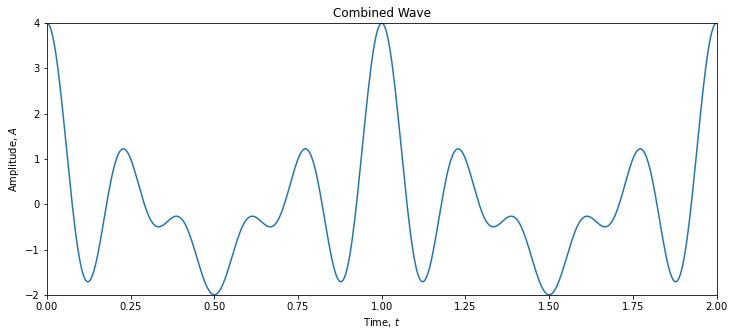

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(t, wave14)
ax.set_xlim(0, 2)
ax.set_ylim(-2, 4)
ax.set_xlabel('Time, $t$')
ax.set_ylabel('Amplitude, $A$')
ax.set_title('Combined Wave')

In [15]:
def freqAnalysis2(freq):
    t = np.linspace(0, 2, 500)
    wave1 = np.cos(-2*np.pi*1*t)
    wave2 = np.cos(-2*np.pi*3*t)
    wave3 = np.cos(-2*np.pi*4*t)
    wave4 = np.cos(-2*np.pi*5*t)
    wave14 = wave1 + wave2 + wave3 + wave4
    fig = plt.figure(figsize=(14,12), constrained_layout=True)
    gs = fig.add_gridspec(2, 4)
    fourComp = np.cos(-2*np.pi*t*freq)*(np.exp(-2*np.pi*1j*t)+np.exp(-2*np.pi*1j*t*3)+ np.exp(-2*np.pi*1j*t*4)+np.exp(-2*np.pi*1j*t*5))
    ax1 = fig.add_subplot(gs[0, 0:2])
    ax1.plot(fourComp.real, fourComp.imag)
    ax1.scatter(np.sum(fourComp).real/len(fourComp), np.sum(fourComp).imag/len(fourComp), color='red', zorder=3)
    ax1.annotate("Centre of \n Mass", (np.sum(fourComp).real/len(fourComp), np.sum(fourComp).imag/len(fourComp)))
    ax1.set_title('$cos(4 \pi t) e^{%s \pi}$' % (-2*freq))
    ax1.set_xlabel('$\mathbb{R}$')
    ax1.set_ylabel('$\mathbb{I}$')
    ax1.set_xlim(-4, 4)
    ax1.set_ylim(-4, 4)
    ax2 = fig.add_subplot(gs[0, 2:4])
    ax2.plot(t, np.cos(2*np.pi*t*freq), label='$cos(4 \pi t) e^{%s \pi}$' % (-2*freq))
    ax2.plot(t, wave14, label='$\cos(4 \pi t)$')
    ax2.set_title('$\cos(4 \pi t)$')
    ax2.set_xlabel('Time, $t$')
    ax2.set_ylabel('Amplitude, $A$')
    ax2.legend()
    ax3 = fig.add_subplot(gs[1, :])
    freqRng = np.linspace(0, 5, 501)
    CoM_Real = np.array([])
    CoM_Imag = np.array([])
    for i in range(501):
        complexRng = (np.cos(-2*np.pi*t*freqRng[i])*(np.exp(-2*np.pi*1j*t)+np.exp(-2*np.pi*1j*t*3)+ np.exp(-2*np.pi*1j*t*4)+np.exp(-2*np.pi*1j*t*5)))
        CoM_Real = np.append(CoM_Real, np.sum(complexRng).real/len(complexRng))
        CoM_Imag = np.append(CoM_Imag, np.sum(complexRng).imag/len(complexRng))
    ax3.plot(freqRng[:int(freq/0.01)+1], CoM_Real[:int(freq/0.01)+1], label='Real Component')
    ax3.plot(freqRng[:int(freq/0.01)+1], CoM_Imag[:int(freq/0.01)+1], label='Imag Component')
    ax3.set_xlim(0, 5)
    ax3.set_ylim(np.min(CoM_Imag), np.max(CoM_Real))
    ax3.set_xlabel('Frequency, $f$')
    ax3.set_ylabel('Centre of Mass Magnitude')
    ax3.legend()
    
interactive_plot = interactive(freqAnalysis2, freq=(0, 5.0))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=2.5, description='freq', max=5.0), Output()), _dom_classes=('widget-in…

In [16]:
def freqAnalysis2(freq):
    t = np.linspace(0, 2, 500)
    wave1 = np.cos(-2*np.pi*1*t)
    wave2 = np.cos(-2*np.pi*3*t)
    wave3 = np.cos(-2*np.pi*4*t)
    wave4 = np.cos(-2*np.pi*5*t)
    wave14 = wave1 + wave2 + wave3 + wave4
    fig = plt.figure(figsize=(14,12), constrained_layout=True)
    gs = fig.add_gridspec(2, 4)
    fourComp = np.cos(-2*np.pi*t*freq)*(np.exp(-2*np.pi*1j*t)+np.exp(-2*np.pi*1j*t*3)+ np.exp(-2*np.pi*1j*t*4)+np.exp(-2*np.pi*1j*t*5))
    ax1 = fig.add_subplot(gs[0, 0:2])
    ax1.plot(fourComp.real, fourComp.imag)
    ax1.scatter(np.sum(fourComp).real/len(fourComp), np.sum(fourComp).imag/len(fourComp), color='red', zorder=3)
    ax1.annotate("Centre of \n Mass", (np.sum(fourComp).real/len(fourComp), np.sum(fourComp).imag/len(fourComp)))
    ax1.set_title('$cos(4 \pi t) e^{%s \pi}$' % (-2*freq))
    ax1.set_xlabel('$\mathbb{R}$')
    ax1.set_ylabel('$\mathbb{I}$')
    ax1.set_xlim(-4, 4)
    ax1.set_ylim(-4, 4)
    ax2 = fig.add_subplot(gs[0, 2:4])
    ax2.plot(t, np.cos(2*np.pi*t*freq), label='$cos(4 \pi t) e^{%s \pi}$' % (-2*freq))
    ax2.plot(t, wave14, label='$\cos(4 \pi t)$')
    ax2.set_title('$\cos(4 \pi t)$')
    ax2.set_xlabel('Time, $t$')
    ax2.set_ylabel('Amplitude, $A$')
    ax2.legend()
    ax3 = fig.add_subplot(gs[1, :])
    freqRng = np.linspace(0, 5, 501)
    CoM_Real = np.array([])
    CoM_Imag = np.array([])
    for i in range(501):
        complexRng = (np.cos(-2*np.pi*t*freqRng[i])*(np.exp(-2*np.pi*1j*t)+np.exp(-2*np.pi*1j*t*3)+ np.exp(-2*np.pi*1j*t*4)+np.exp(-2*np.pi*1j*t*5)))
        CoM_Real = np.append(CoM_Real, np.sum(complexRng).real)
        CoM_Imag = np.append(CoM_Imag, np.sum(complexRng).imag)
    ax3.plot(freqRng[:int(freq/0.01)+1], CoM_Real[:int(freq/0.01)+1], label='Real Component')
    ax3.plot(freqRng[:int(freq/0.01)+1], CoM_Imag[:int(freq/0.01)+1], label='Imag Component')
    ax3.set_xlim(0, 5)
    ax3.set_ylim(np.min(CoM_Imag), np.max(CoM_Real))
    ax3.set_xlabel('Frequency, $f$')
    ax3.set_ylabel('Centre of Mass Magnitude')
    ax3.legend()
    
interactive_plot = interactive(freqAnalysis2, freq=(0, 5.0))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=2.5, description='freq', max=5.0), Output()), _dom_classes=('widget-in…

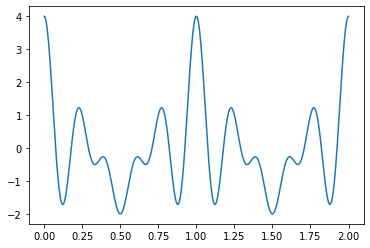

In [17]:
expFunc = np.exp(-2*np.pi*1j*t)+np.exp(-2*np.pi*1j*t*3)+ np.exp(-2*np.pi*1j*t*4)+np.exp(-2*np.pi*1j*t*5)
fig, ax = plt.subplots()
_ = ax.plot(t, expFunc.real)

***  
  
by Dr J T Wharton

***